In [1]:
using JuMP, Gurobi, PyPlot

In [2]:
function l(q, qd)
    .5*m*(qd^2) - m*g*q
    end

function ld(qk, qkp1)
    q = qk
    qd = (qkp1 - qk)/h
    l(q, qd)
    end

ld (generic function with 1 method)

In [3]:
function solution(q0, qd0, t)
    -.5*g*t^2 + qd0*t + q0
end

function reference(q0, qd0, t_array)
    q = []
    for t in t_array
        push!(q, solution(q0, qd0, t))
    end
    q
end

reference (generic function with 1 method)

In [13]:
function simulate(q0, qN, N) 
    m = Model(solver=GurobiSolver(OutputFlag=0))
    @variable(m, q[0:N] <= 10)
    @constraint(m, q[0] == q0)
    @constraint(m, q[N] == qN)
    L = 0
    for i = 0:N-1
        L += ld(q[i], q[i+1])
    end
    @objective(m, Min, L)
    solve(m)
    getvalue(q)
end

simulate (generic function with 1 method)

In [14]:
m = 1
g = 10
h = .01
N = 500
q0 = 2
qN = 4

4

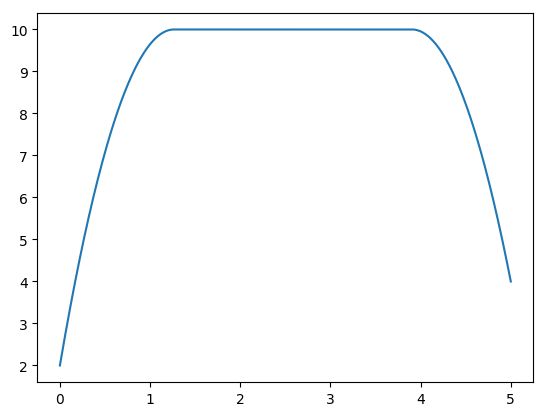

Academic license - for non-commercial use only


1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f3fced0>

In [15]:
time = linspace(0, N*h, N+1)
q = simulate(q0, qN, N)[:]
ref = reference(q0, (q[2]-q[1])/h, time)
plot(time, q)
#plot(time, ref)